In [ ]:
import numpy as np
import sympy as sp
import numpy.polynomial as P
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.polynomial.polynomial as PP
import scipy.interpolate as scip
from scipy.interpolate import lagrange, BarycentricInterpolator

Polinomios

In [3]:

'''
x = sp.Symbol('x')

a = 2

p = sp.poly(1+2* x +3* x **2)
q = sp.Poly([2,5],x)
p_2 = sp.Poly([3,2,1],x)
p_3 = sp.poly(np.prod(x-np.array([1,2])))

print(p(a))

print(f"El grado es: {p.degree()}")
print(f"El intervalo de raices es: {p.intervals()}")
print(f"Polinimio shifted: {p.shift(a)}")
print(f"Expresión de horner: {sp.horner(p)}")
d,r = sp.div(p,q)
print(f"Dividendo{d}")
print(f"Resto{r}")

print(f"Derivada{p.diff()}")
print(f"Integral{p.integrate()}")

y0 = 4
y1= 2
y2 = 3
print(sp.interpolate([y0, y1, y2],x))

b= 0
f = sp.sin(x)
n = 9
ser = sp.series(f,x,b,n)
print(f"Polinomio de taylor del seno de x: {ser}")
#pol = sp.remove0(ser)
#print(f"polinomio con 0 eliminado: {pol}")


p = P.Polynomial([1,2,3])
print(f"Polinomio: {p}")
p = P.Polynomial.fromroots([1,2])
print(f"Polinomio: {p}")
print(f"Polinomio en punto x = a: {p(a)}")
print(p.coef)
print(p.domain)
print(p.window)

n= 1
a = 0
c = 0
p_int = p.integ(m=n, k=[c]*n)
print(p_int)
print(p.deriv(1))
print(p.basis(2))

'''



'\nx = sp.Symbol(\'x\')\n\na = 2\n\np = sp.poly(1+2* x +3* x **2)\nq = sp.Poly([2,5],x)\np_2 = sp.Poly([3,2,1],x)\np_3 = sp.poly(np.prod(x-np.array([1,2])))\n\nprint(p(a))\n\nprint(f"El grado es: {p.degree()}")\nprint(f"El intervalo de raices es: {p.intervals()}")\nprint(f"Polinimio shifted: {p.shift(a)}")\nprint(f"Expresión de horner: {sp.horner(p)}")\nd,r = sp.div(p,q)\nprint(f"Dividendo{d}")\nprint(f"Resto{r}")\n\nprint(f"Derivada{p.diff()}")\nprint(f"Integral{p.integrate()}")\n\ny0 = 4\ny1= 2\ny2 = 3\nprint(sp.interpolate([y0, y1, y2],x))\n\nb= 0\nf = sp.sin(x)\nn = 9\nser = sp.series(f,x,b,n)\nprint(f"Polinomio de taylor del seno de x: {ser}")\n#pol = sp.remove0(ser)\n#print(f"polinomio con 0 eliminado: {pol}")\n\n\np = P.Polynomial([1,2,3])\nprint(f"Polinomio: {p}")\np = P.Polynomial.fromroots([1,2])\nprint(f"Polinomio: {p}")\nprint(f"Polinomio en punto x = a: {p(a)}")\nprint(p.coef)\nprint(p.domain)\nprint(p.window)\n\nn= 1\na = 0\nc = 0\np_int = p.integ(m=n, k=[c]*n)\nprint(p_i

Base de polinomios de lagrange

In [4]:
fun = lambda x : np.power(x,2)
base = lambda x : np.array ([np.sin(x),np.cos(x),0*x+1,np.log1p(x)])
x = np.array([1,2,3,4])

y = fun(x)
A = base(x)
c= np.linalg.solve(A.T,y)
print("Coeficientes: {}" .format(c))

Coeficientes: [-3.16182935  2.77248401 -7.86571943 14.46781848]


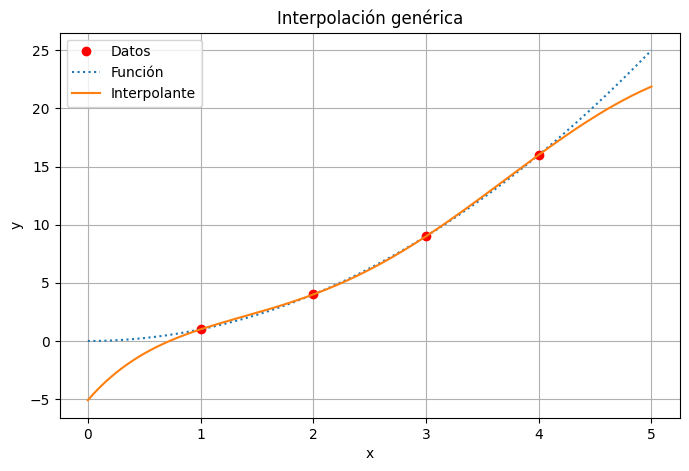

In [5]:
X = np.linspace(0, 5, 201)
Y = np.dot(c, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [6]:
error1 = abs(Y -fun(X))
print("Máximo error de {} en x = {} ".format(error1.max(),X[error1.argmax()]))

idx =  (X>=x[0]) * (X<=x[-1])
error2 = abs(Y[idx] - fun(X[idx]))
print("Máximo error de {} en x = {} ".format(error2.max(),X[error2.argmax()]))

Máximo error de 5.0932354265161175 en x = 0.0 
Máximo error de 0.19624543056554344 en x = 0.375 


Mismo ejemplo cambiando la base

In [7]:
fun = lambda x : np.power(x,2)
base = lambda x : np.array ([0*x+1,x,x**2,x**3])
x = np.array([1,2,3,4])

y = fun(x)
A = base(x)
c= np.linalg.solve(A.T,y)
print("Coeficientes: {}" .format(c))
pol = P.Polynomial(c)
Y = pol(X)
print(f"Polinomio: {pol}")

Coeficientes: [0. 0. 1. 0.]
Polinomio: 0.0 + 0.0 x + 1.0 x**2 + 0.0 x**3


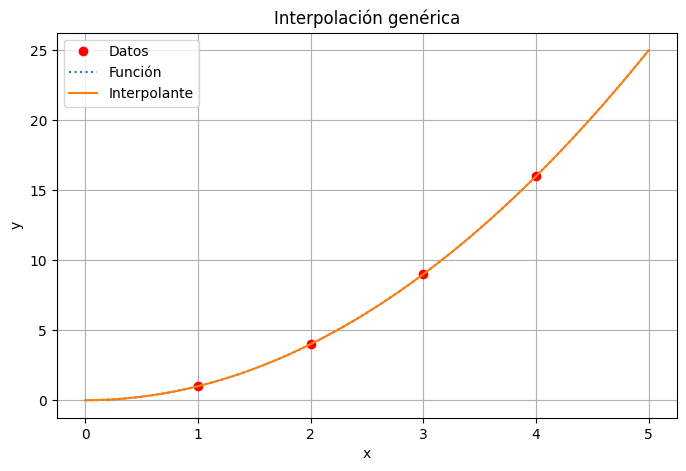

In [8]:
X = np.linspace(0, 5, 201)
Y = np.dot(c, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [9]:
c1 = np.linalg.solve(np.vander(x),y)
print("coeficientes: {}".format(c1))
pol = P.Polynomial(c1)
Y = pol(X)
print(f"Polinomio: {pol}")

coeficientes: [ 0.  1.  0. -0.]
Polinomio: 0.0 + 1.0 x + 0.0 x**2 + -0.0 x**3


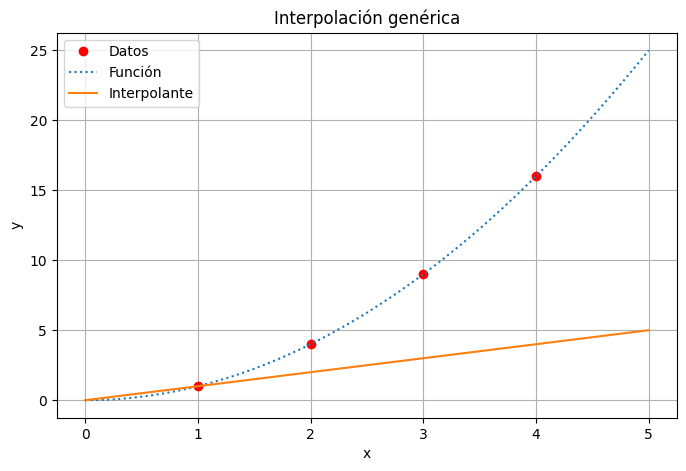

In [10]:
X = np.linspace(0, 5, 201)
Y = np.dot(c1, base(X))
fig = plt.figure(1, figsize=(8, 5), clear=True)
plt.plot(x, y, 'ro', label='Datos')
plt.plot(X, fun(X), ':', label='Función')
plt.plot(X, Y, label='Interpolante')
plt.legend()
plt.title('Interpolación genérica')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Condicionamiento del sistema

In [11]:


npts = 25
x = np.arange(npts, dtype=float)
V, E, orden = np.vander(x), [], 10

for i in range(1, npts + 1):
    A = V[-i:, -i:]
    b = np.sum(A, 1)  # A @ X[-i:]
    s = la.solve(A, b)
    if i == orden + 1:
        poli = PP.Polynomial(s[::-1])
    E.append(la.norm(s - 1))  # s - X[-i:]

E = np.array(E)
print("error (j = {}) = {}".format(E.argmax(), E.max()))
pole = PP.Polynomial(np.ones(orden + 1))


error (j = 23) = 2.7760902089196883e+20


C:\Users\miguel\AppData\Local\Temp\ipykernel_25040\1472238000.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


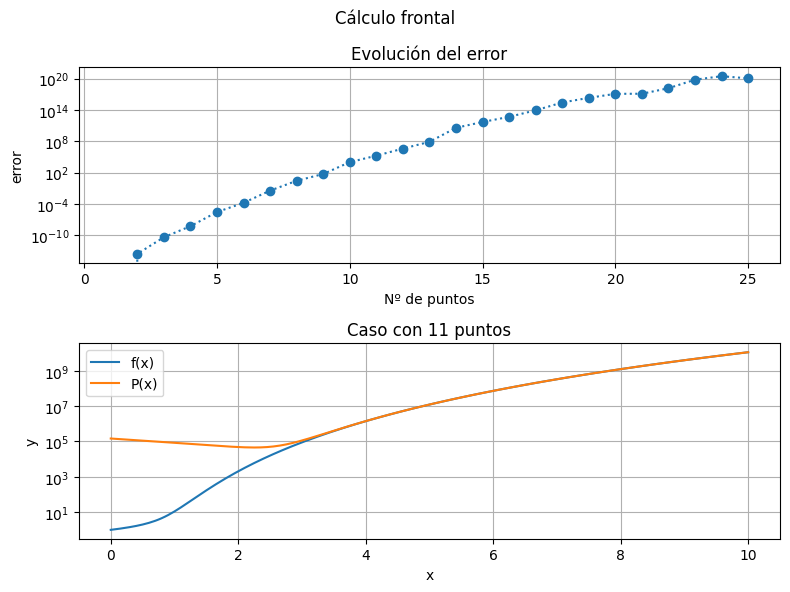

In [12]:
fig, axs = plt.subplots(2, 1, num=1, figsize=(8, 6), clear=True)
plt.suptitle("Cálculo frontal")

# ---> Representación del error
axs[0].set(
    title="Evolución del error",
    ylabel=r"error",
    xlabel="Nº de puntos"
)
axs[0].semilogy(x + 1, E, ":o")
axs[0].grid()

# ---> Representación de una solución
X = np.linspace(0, orden, 201)
axs[1].set(
    title=f"Caso con {orden + 1} puntos",
    xlabel="x",
    ylabel="y"
)
axs[1].semilogy(X, pole(X), ls="-", label="f(x)")
axs[1].semilogy(X, poli(X), ls="-", label="P(x)")
axs[1].legend()
axs[1].grid()

fig.tight_layout()
fig.show()


Cálculo del polinomio de interpolación

Lag.: error (0.435000) = 7.444666e-01
DD  : error (0.435000) = 7.444666e-01
Lag.: error (2.715000) = 2.224179e-01
DD  : error (2.715000) = 2.224179e-01
Lag.: error (0.105000) = 1.408287e-02
DD  : error (0.105000) = 1.408287e-02
Lag.: error (3.000000) = 2.332587e-05
DD  : error (0.045000) = 3.253837e-07


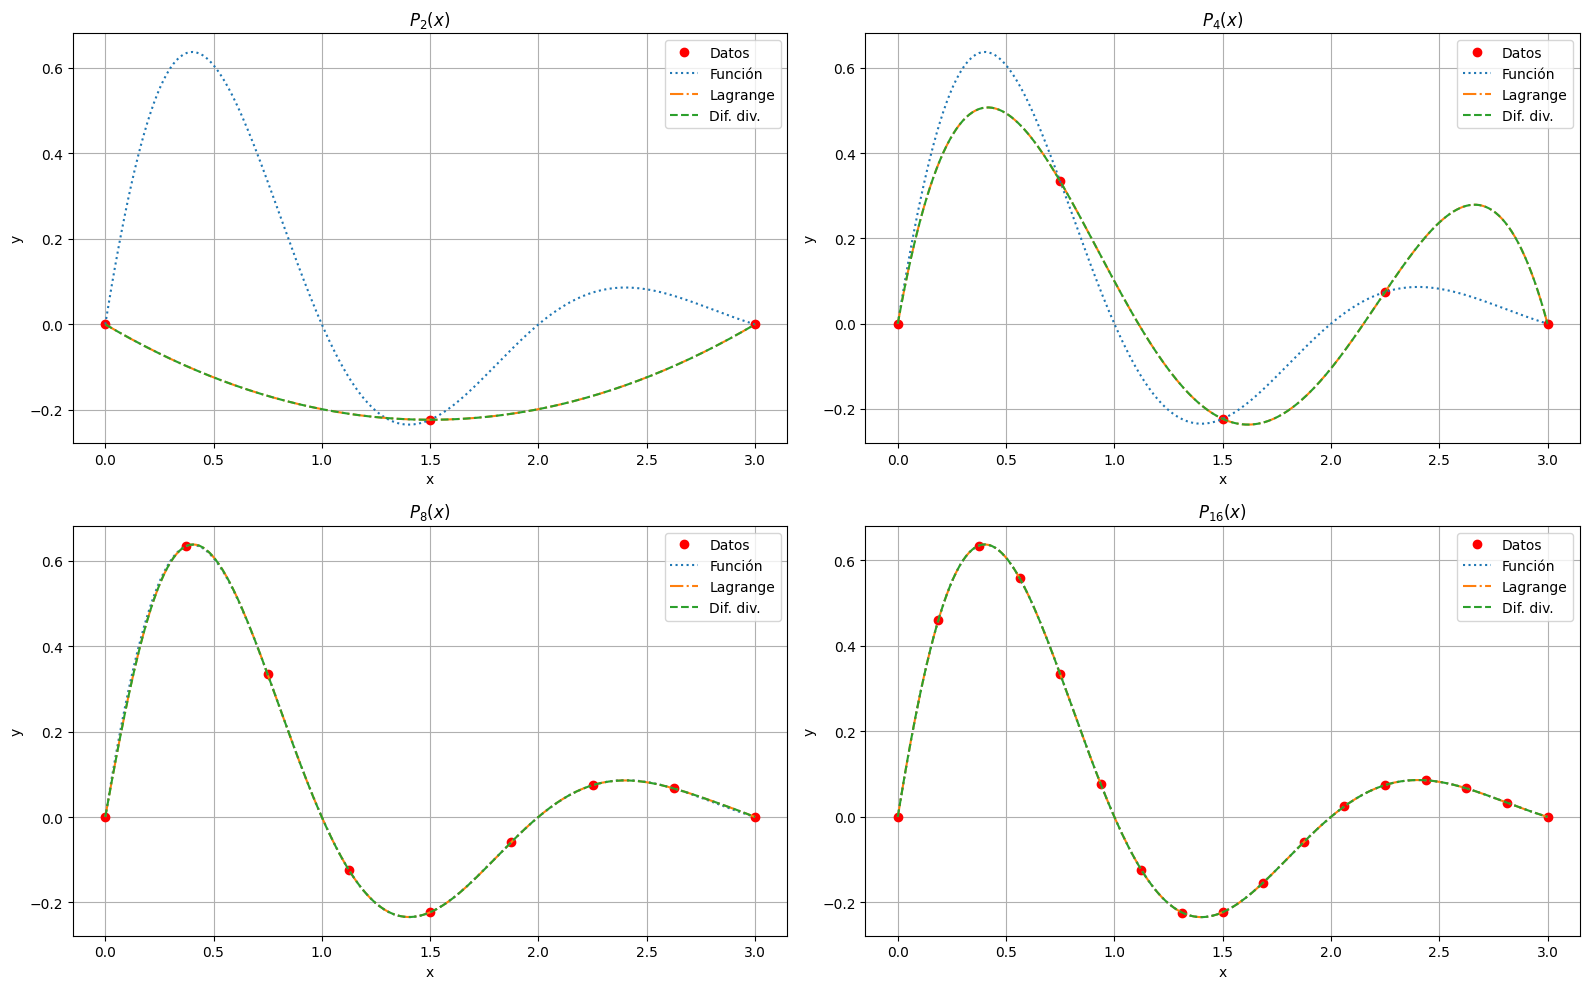

In [13]:
fun = lambda x: np.sin(np.pi * x) * np.exp(-x)

xa, xb = 0, 3
Npts = [3, 5, 9, 17]

fig, ax = plt.subplots(2, 2, num=2, figsize=(16, 10), clear=True)
axes = ax.flatten()

X = np.linspace(xa, xb, 201)
Y = fun(X)

for j, npts in enumerate(Npts):
    x = np.linspace(xa, xb, npts)
    y = fun(x)

    pla = lagrange(x, y)
    pdd = BarycentricInterpolator(x, y)

    ela = np.abs(Y - pla(X))
    edd = np.abs(Y - pdd(X))

    ilm = ela.argmax()
    idm = edd.argmax()
    print(f"Lag.: error ({X[ilm]:.6f}) = {ela[ilm]:.6e}")
    print(f"DD  : error ({X[idm]:.6f}) = {edd[idm]:.6e}")

    axj = axes[j]
    axj.plot(x, y, 'ro', label='Datos')
    axj.plot(X, fun(X), ls=':', label='Función')
    axj.plot(X, pla(X), ls='-.', label='Lagrange')
    axj.plot(X, pdd(X), ls='--', label='Dif. div.')
    axj.set(title=f"$P_{{{npts - 1}}}(x)$", xlabel="x", ylabel="y")
    axj.legend()
    axj.grid()

fig.tight_layout()
plt.show()

Lag.: error (-1.800000) = 8.312361e-01
DD  : error (1.800000) = 8.312361e-01
Lag.: error (-3.950000) = 5.600816e-01
DD  : error (-3.950000) = 5.600816e-01
Lag.: error (-4.600000) = 1.484712e+00
DD  : error (-4.600000) = 1.484712e+00
Lag.: error (-4.850000) = 5.571936e+00
DD  : error (-4.850000) = 5.571936e+00


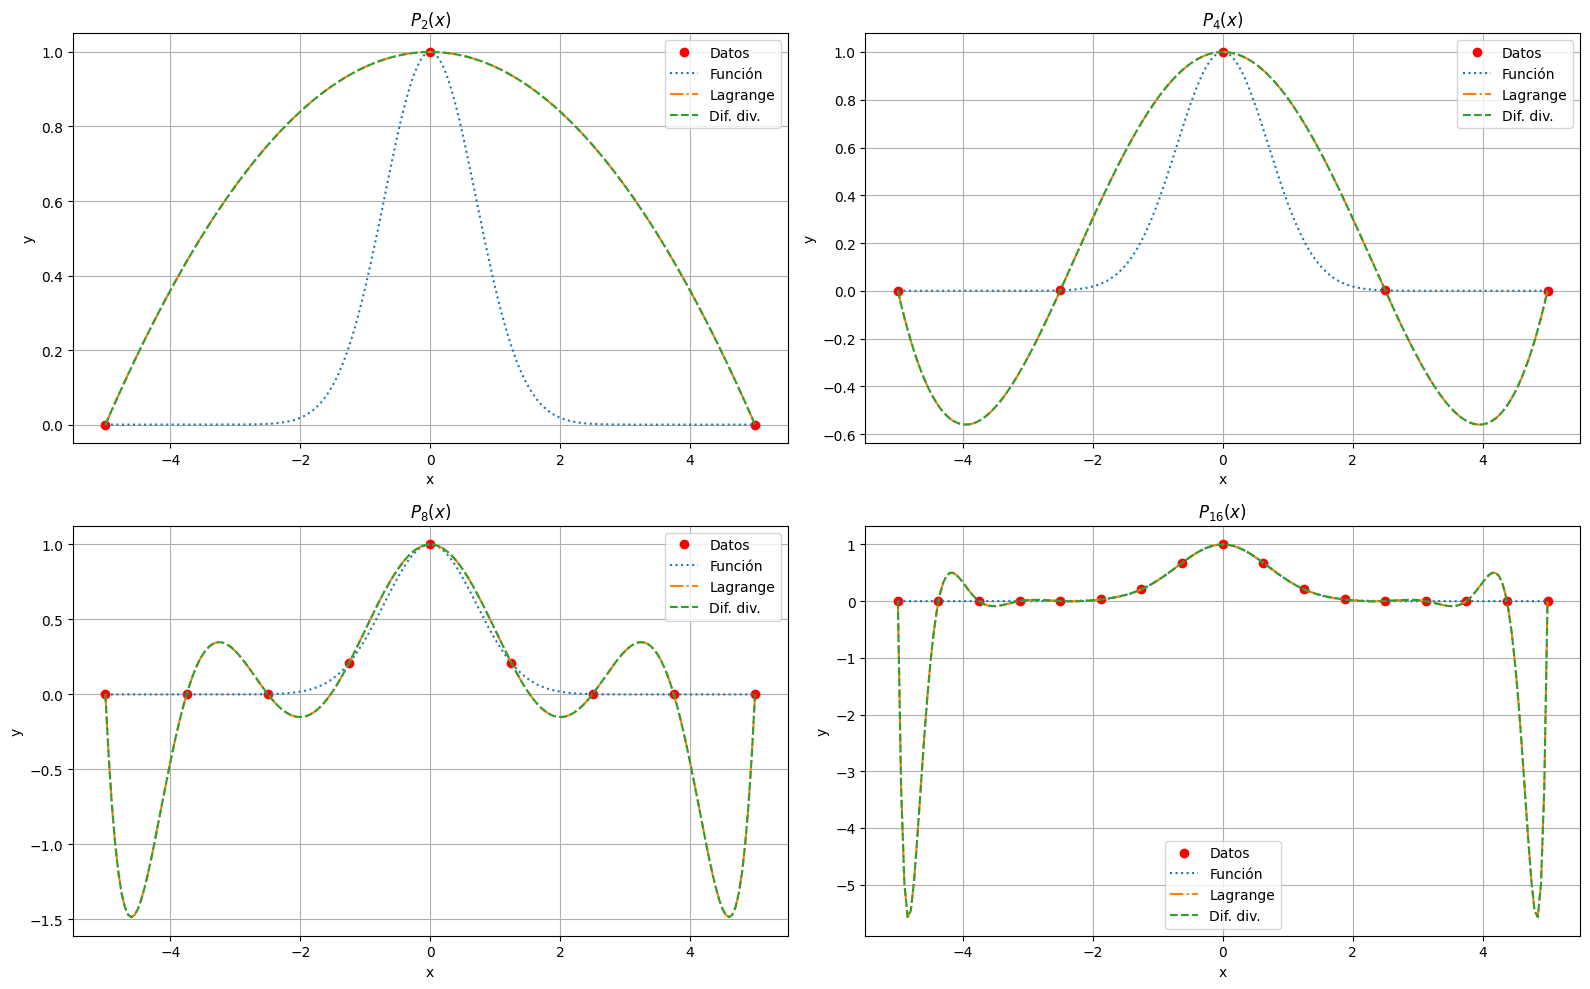

In [ ]:
fun = lambda x: np.exp(-(x**2))

xa, xb = -5, 5
Npts = [3, 5, 9, 17]

fig, ax = plt.subplots(2, 2, num=2, figsize=(16, 10), clear=True)
axes = ax.flatten()

X = np.linspace(xa, xb, 201)
Y = fun(X)

for j, npts in enumerate(Npts):
    x = np.linspace(xa, xb, npts)
    y = fun(x)

    pla = lagrange(x, y)
    pdd = BarycentricInterpolator(x, y)

    ela = np.abs(Y - pla(X))
    edd = np.abs(Y - pdd(X))

    ilm = ela.argmax()
    idm = edd.argmax()
    print(f"Lag.: error ({X[ilm]:.6f}) = {ela[ilm]:.6e}")
    print(f"DD  : error ({X[idm]:.6f}) = {edd[idm]:.6e}")

    axj = axes[j]
    axj.plot(x, y, 'ro', label='Datos')
    axj.plot(X, fun(X), ls=':', label='Función')
    axj.plot(X, pla(X), ls='-.', label='Lagrange')
    axj.plot(X, pdd(X), ls='--', label='Dif. div.')
    axj.set(title=f"$P_{{{npts - 1}}}(x)$", xlabel="x", ylabel="y")
    axj.legend()
    axj.grid()

fig.tight_layout()
plt.show()

Tchebisev

In [17]:
pol = P.Chebyshev.basis(3)
print(pol.roots())

[-8.66025404e-01  1.08311797e-16  8.66025404e-01]


Polinomio de Hermite

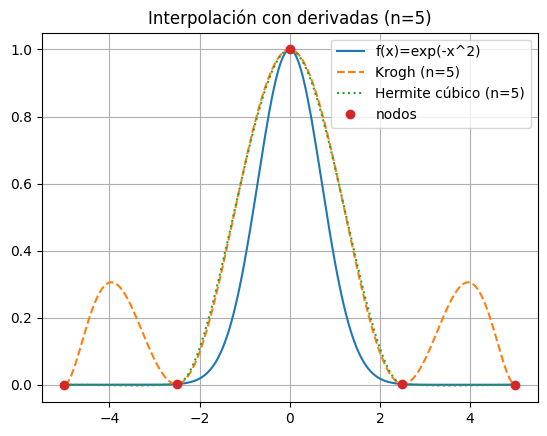

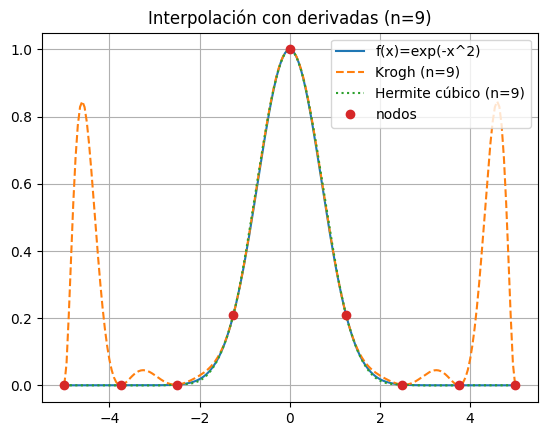

In [20]:
# --- Definición simbólica y funciones numéricas ---
x = sp.symbols('x', real=True)
fs  = sp.exp(-x**2)
dfs = sp.diff(fs, x)

xa, xb = -5.0, 5.0
Npts = [5, 9]

fn  = sp.lambdify(x, fs,  'numpy')   # f(x)
dfn = sp.lambdify(x, dfs, 'numpy')   # f'(x)

X = np.linspace(xa, xb, 201)
Y = fn(X)

# --- Interpolación Krogh (con derivadas) y Hermite cúbico ---
for j, npts in enumerate(Npts):
    # nodos equiespaciados
    ptos = np.linspace(xa, xb, npts)

    # valores de f y f' en los nodos
    fx  = fn(ptos)
    dfx = dfn(ptos)

    # --- Krogh ---
    # xk: [x0, x0, x1, x1, ...]; yk: [f(x0), f'(x0), f(x1), f'(x1), ...]
    xk = np.vstack([ptos, ptos]).T.flatten()
    yk = np.vstack([fx,   dfx ]).T.flatten()
    pol_krogh = scip.KroghInterpolator(xk, yk)

    # --- Hermite cúbico ---
    # requiere x estrictamente creciente, y y dydx del mismo tamaño
    pol_hermite = scip.CubicHermiteSpline(ptos, fx, dfx)

    # --- Gráfica opcional para comparar ---
    plt.figure()
    plt.plot(X, Y, label='f(x)=exp(-x^2)')
    plt.plot(X, pol_krogh(X), '--', label=f'Krogh (n={npts})')
    plt.plot(X, pol_hermite(X), ':', label=f'Hermite cúbico (n={npts})')
    plt.plot(ptos, fx, 'o', label='nodos')
    plt.title(f'Interpolación con derivadas (n={npts})')
    plt.grid(True)
    plt.legend()
    plt.show()

Interpolación segmentaria

Itp. segmentaria con 3 puntos
Itp. segmentaria con 5 puntos
Itp. segmentaria con 9 puntos
Itp. segmentaria con 17 puntos


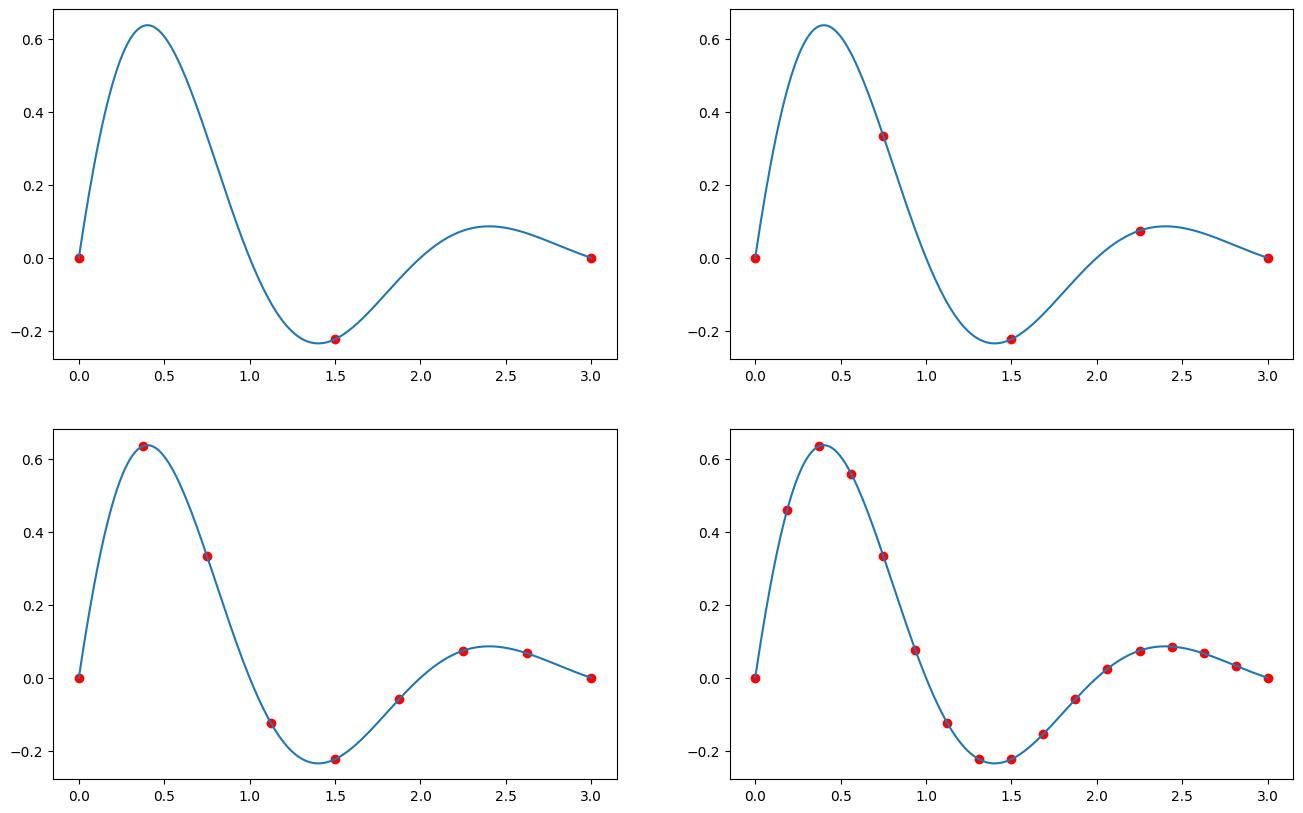

Itp. segmentaria con 3 puntos
       zero: err_max = 6.375e-01 en x = 0.405
    slinear: err_max = 6.989e-01 en x = 0.42
  quadratic: err_max = 7.445e-01 en x = 0.435
      cubic: no disponible (The number of derivatives at boundaries does not match: expected 1, got 0+0)
Itp. segmentaria con 5 puntos
       zero: err_max = 6.375e-01 en x = 0.405
    slinear: err_max = 4.723e-01 en x = 0.345
  quadratic: err_max = 3.209e-01 en x = 0.33
      cubic: err_max = 2.029e-01 en x = 0.345
Itp. segmentaria con 9 puntos
       zero: err_max = 6.313e-01 en x = 0.36
    slinear: err_max = 1.429e-01 en x = 0.195
  quadratic: err_max = 1.140e-02 en x = 0.195
      cubic: err_max = 2.784e-02 en x = 0.12
Itp. segmentaria con 17 puntos
       zero: err_max = 4.476e-01 en x = 0.18
    slinear: err_max = 3.563e-02 en x = 0.285
  quadratic: err_max = 2.451e-03 en x = 0.06
      cubic: err_max = 3.233e-03 en x = 0.075


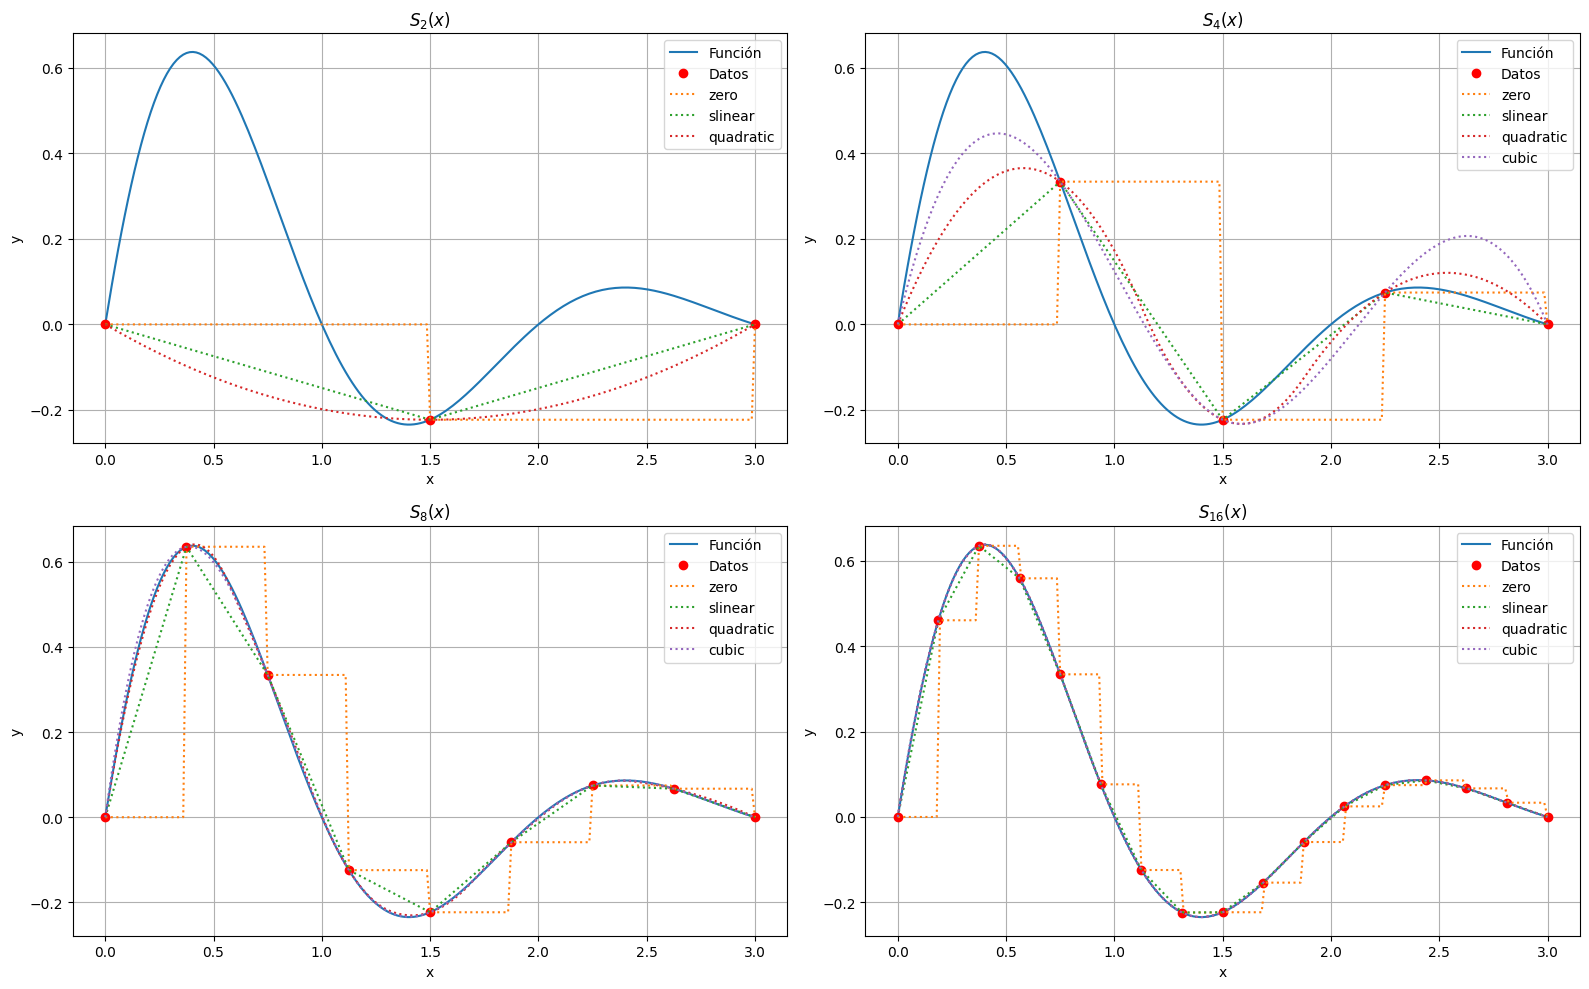

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

fn   = lambda x: np.sin(np.pi*x) * np.exp(-x)
npts = [3, 5, 9, 17]
xa, xb = 0.0, 3.0
tipos = ['zero', 'slinear', 'quadratic', 'cubic']

X = np.linspace(xa, xb, 201)
Y = fn(X)

fig = plt.figure(figsize=(16,10), clear=True)

for j, n in enumerate(npts):
    # nodos y datos
    x = np.linspace(xa, xb, n)
    y = fn(x)

    ax = plt.subplot(2, 2, j+1)
    ax.plot(X, Y, '-', label='Función')
    ax.plot(x, y, 'ro', label='Datos')

    print(f"Itp. segmentaria con {n} puntos")
    for kind in tipos:
        try:
            pol = scip.interp1d(x, y, kind=kind)   # bounds_error=False por defecto en SciPy>=1.10
            Z = pol(X)
            err = np.abs(Y - Z)
            erm = err.max(); ier = err.argmax()
            print(f"  {kind:>9}: err_max = {erm:.3e} en x = {X[ier]:.6g}")
            ax.plot(X, Z, ':', label=kind)
        except Exception as e:
            # no ocultes errores; si alguno no está disponible para n pequeño, lo verás
            print(f"  {kind:>9}: no disponible ({e})")

    titulo = f"$S_{{{n-1}}}(x)$"
    ax.set(title=titulo, xlabel="x", ylabel="y")
    ax.grid(True)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


Itp. segmentaria con 3 puntos
       zero: err_max = 1.000e+00 en x = 4.95
    slinear: err_max = 6.044e-01 en x = -1.7
  quadratic: err_max = 8.312e-01 en x = 1.8
      cubic: no disponible (The number of derivatives at boundaries does not match: expected 1, got 0+0)
Itp. segmentaria con 5 puntos
       zero: err_max = 9.975e-01 en x = 2.45
    slinear: err_max = 3.002e-01 en x = -1.4
  quadratic: err_max = 3.957e-01 en x = 1.15
      cubic: err_max = 4.485e-01 en x = -1.3
Itp. segmentaria con 9 puntos
       zero: err_max = 7.879e-01 en x = -0.05
    slinear: err_max = 1.060e-01 en x = -0.35
  quadratic: err_max = 2.123e-02 en x = -0.45
      cubic: err_max = 2.763e-02 en x = -0.8
Itp. segmentaria con 17 puntos
       zero: err_max = 4.458e-01 en x = -0.65
    slinear: err_max = 6.915e-02 en x = -0.3
  quadratic: err_max = 1.415e-02 en x = 0.85
      cubic: err_max = 7.027e-03 en x = 0.9


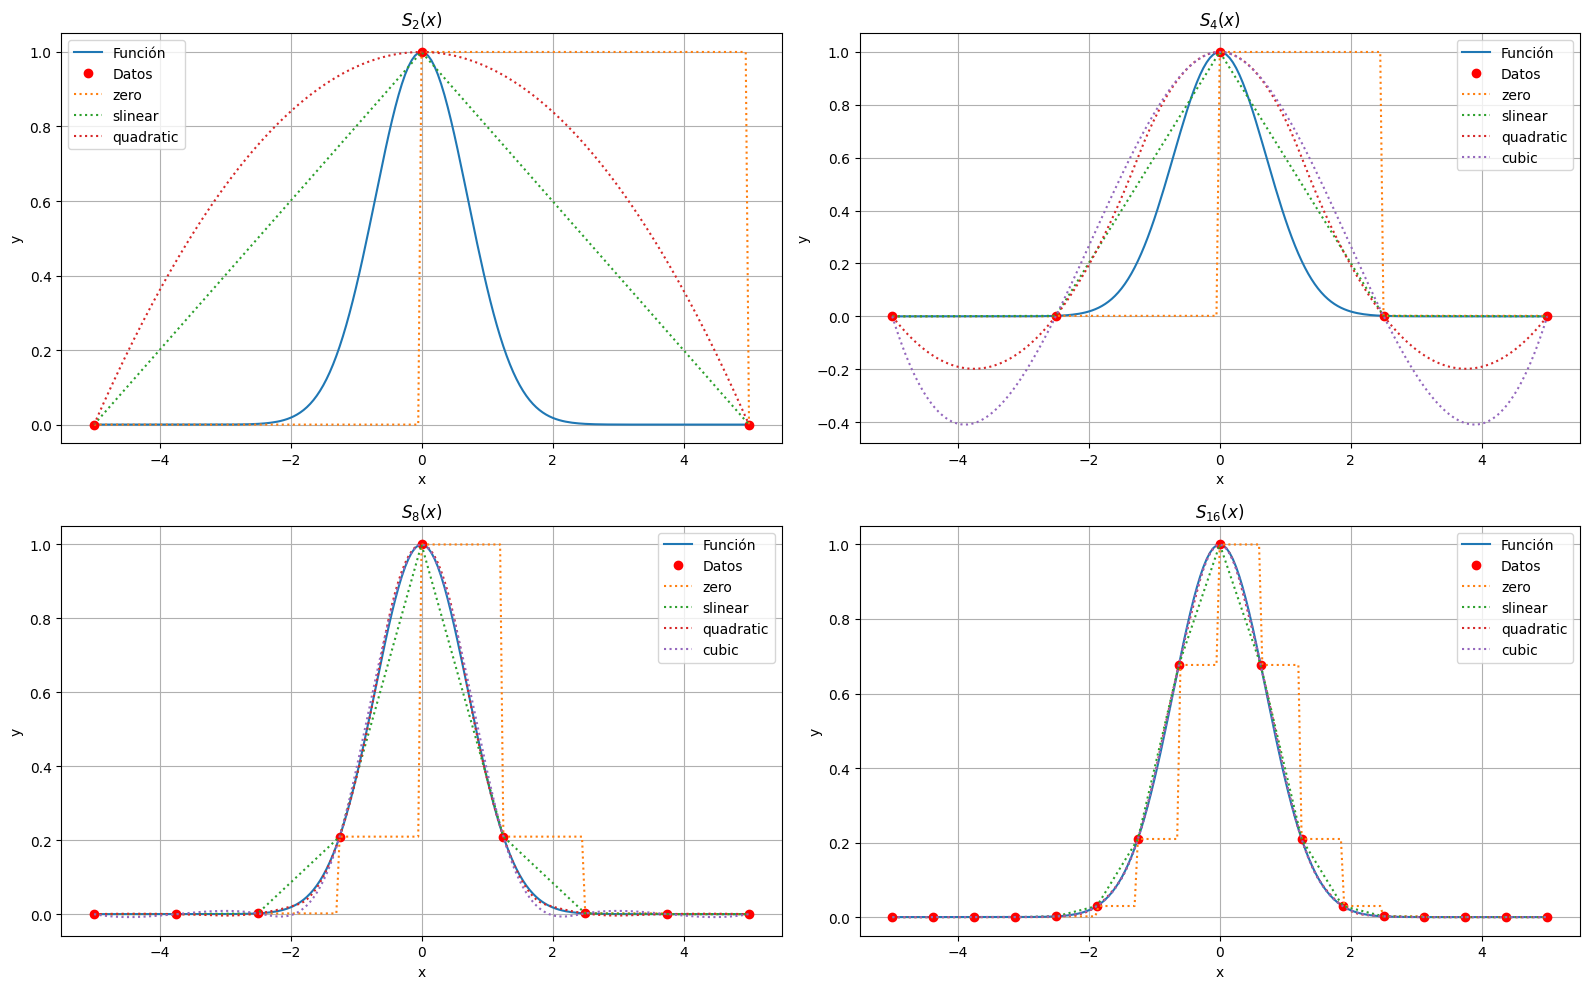

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

fn   = lambda x: np.exp(-x**2)
npts = [3, 5, 9, 17]
xa, xb = -5.0, 5.0
tipos = ['zero', 'slinear', 'quadratic', 'cubic']

X = np.linspace(xa, xb, 201)
Y = fn(X)

fig = plt.figure(figsize=(16,10), clear=True)

for j, n in enumerate(npts):
    # nodos y datos
    x = np.linspace(xa, xb, n)
    y = fn(x)

    ax = plt.subplot(2, 2, j+1)
    ax.plot(X, Y, '-', label='Función')
    ax.plot(x, y, 'ro', label='Datos')

    print(f"Itp. segmentaria con {n} puntos")
    for kind in tipos:
        try:
            pol = scip.interp1d(x, y, kind=kind)   # bounds_error=False por defecto en SciPy>=1.10
            Z = pol(X)
            err = np.abs(Y - Z)
            erm = err.max(); ier = err.argmax()
            print(f"  {kind:>9}: err_max = {erm:.3e} en x = {X[ier]:.6g}")
            ax.plot(X, Z, ':', label=kind)
        except Exception as e:
            # no ocultes errores; si alguno no está disponible para n pequeño, lo verás
            print(f"  {kind:>9}: no disponible ({e})")

    titulo = f"$S_{{{n-1}}}(x)$"
    ax.set(title=titulo, xlabel="x", ylabel="y")
    ax.grid(True)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


Itp. segmentaria con 5 puntos
  not-a-knot: err_max = 2.029e-01 en x = 0.345
    natural: err_max = 3.637e-01 en x = 0.315
    clamped: err_max = 4.713e-01 en x = 0.315
Itp. segmentaria con 9 puntos
  not-a-knot: err_max = 2.784e-02 en x = 0.12
    natural: err_max = 5.816e-02 en x = 0.15
    clamped: err_max = 2.056e-01 en x = 0.15


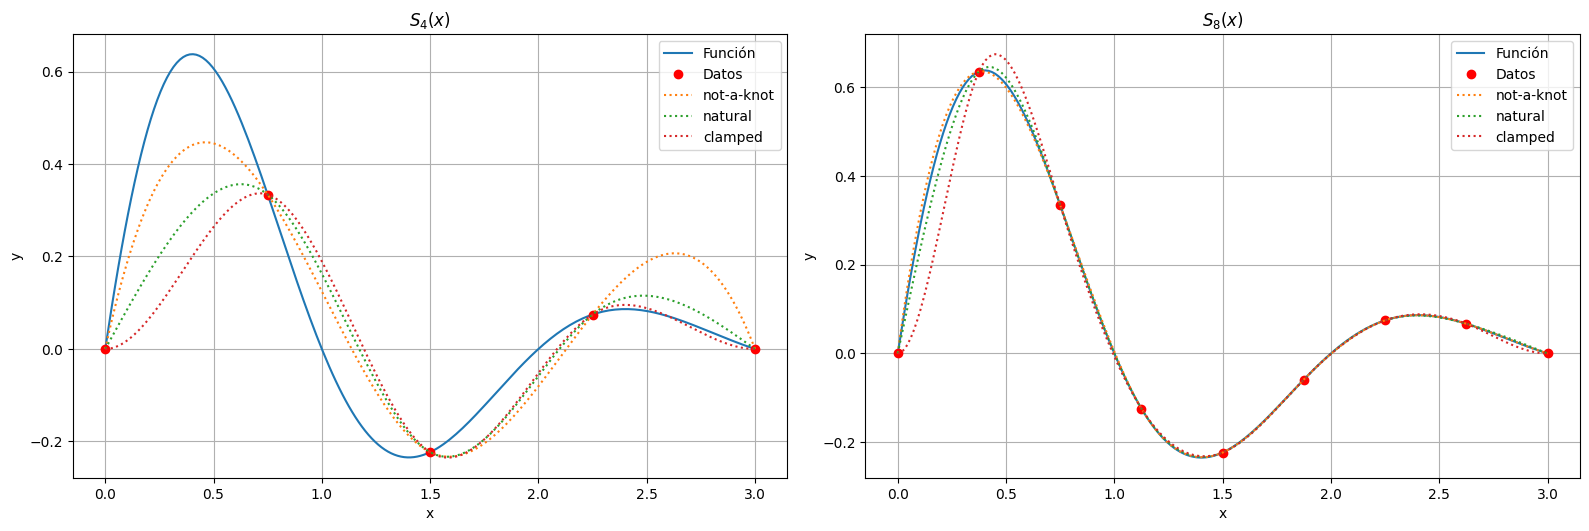

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as scip

fn   = lambda x: np.sin(np.pi*x) * np.exp(-x)
npts = [5, 9]
xa, xb = 0.0, 3.0
tipos = ['not-a-knot', 'natural', 'clamped']

X = np.linspace(xa, xb, 201)
Y = fn(X)

fig = plt.figure(figsize=(16,10), clear=True)

for j, n in enumerate(npts):
    # nodos y datos
    x = np.linspace(xa, xb, n)
    y = fn(x)

    ax = plt.subplot(2, 2, j+1)
    ax.plot(X, Y, '-', label='Función')
    ax.plot(x, y, 'ro', label='Datos')

    print(f"Itp. segmentaria con {n} puntos")
    for kind in tipos:
        try:
            pol = scip.CubicSpline(x, y, bc_type=kind)   # bounds_error=False por defecto en SciPy>=1.10
            Z = pol(X)
            err = np.abs(Y - Z)
            erm = err.max(); ier = err.argmax()
            print(f"  {kind:>9}: err_max = {erm:.3e} en x = {X[ier]:.6g}")
            ax.plot(X, Z, ':', label=kind)
        except Exception as e:
            # no ocultes errores; si alguno no está disponible para n pequeño, lo verás
            print(f"  {kind:>9}: no disponible ({e})")

    titulo = f"$S_{{{n-1}}}(x)$"
    ax.set(title=titulo, xlabel="x", ylabel="y")
    ax.grid(True)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


In [36]:
import os
print(os.getcwd())
print(os.path.abspath('./data/ITP_Porsche911_Perfil.txt'))

c:\Users\miguel\Documents\Estudios\25-26\MNAF\MNAF\practicas
c:\Users\miguel\Documents\Estudios\25-26\MNAF\MNAF\practicas\data\ITP_Porsche911_Perfil.txt


cwd: C:\Users\miguel\Documents\Estudios\25-26\MNAF\MNAF\practicas
C:\Users\miguel\Documents\Estudios\25-26\MNAF\MNAF\data\Porsche911_perfil.txt True
C:\Users\miguel\Documents\Estudios\25-26\MNAF\MNAF\data\Porsche911_Perfil.jpg True


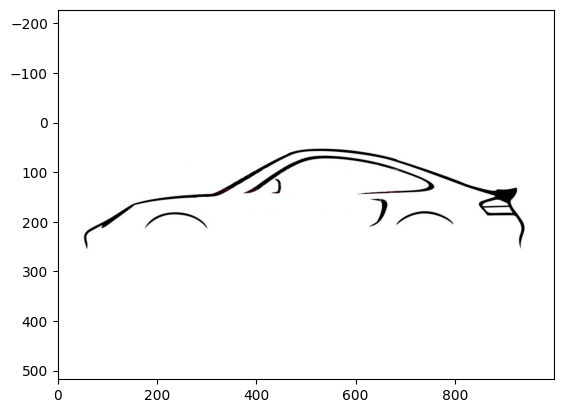

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

cwd = Path().resolve()
print("cwd:", cwd)

txt = cwd.parent / "data" / "Porsche911_perfil.txt"   # sin ITP_ y subiendo un nivel
jpg = cwd.parent / "data" / "Porsche911_Perfil.jpg"

print(txt, txt.exists())
print(jpg, jpg.exists())

sal = np.genfromtxt(txt, delimiter=';')  # en tu celda usas ';'
x = sal.T[0]
y = sal.T[1]


img = plt.imread(jpg)
plt.axis("equal")
plt.imshow(img)
plt.show()


nan
